# Melakukan import semua package yang diperlukan untuk melakukan prediksi

In [71]:
#Melakukan import semua package yang diperlukan untuk melakukan prediksi
import pandas as pd
import re
import os
import datetime as dt
import xlrd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

from pandas import set_option
# set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

##### import stuff from scikit learn
##### import semua model yang akan digunakan untuk melakukan prediksi
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn.model_selection import KFold, cross_val_score,LeavePGroupsOut, LeaveOneGroupOut, cross_val_predict
from sklearn.metrics import confusion_matrix, make_scorer, f1_score, accuracy_score, recall_score, precision_score
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import HistGradientBoostingClassifier,HistGradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import KFold, cross_val_score,LeavePGroupsOut, LeaveOneGroupOut, cross_val_predict
from sklearn.metrics import confusion_matrix, make_scorer, f1_score, accuracy_score, recall_score, precision_score
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# MASUKAN SEMUA DATA LOG DARI SEMUA SUMUR YANG ADA KE DALAM PROGRAM DAN MELAKUKAN REPLACING VALUE TERHADAP CELL YANG MEMILIKI NILAI -999.25

In [4]:
#Masukan semua data log dari semua sumur yang ada ke dalam program

df1=pd.read_csv("I1.csv",delimiter=r"\s+") 
df1['WELLNAME'] = "I1" 
df2=pd.read_csv("I3.csv",delimiter=r"\s+")
df2['WELLNAME'] = 'I3'
df3 = pd.read_csv("W1.csv",delimiter=r"\s+")
df3['WELLNAME'] = 'W1'
df4 = pd.read_csv("W2.csv",delimiter=r"\s+")
df4['WELLNAME'] = 'W2'
df5 = pd.read_csv("W3.csv",delimiter=r"\s+")
df5['WELLNAME'] = 'W3'
df6 = pd.read_csv("W4.csv",delimiter=r"\s+")
df6['WELLNAME'] = 'W4'
df7 = pd.read_csv("W5.csv",delimiter=r"\s+")
df7['WELLNAME'] = 'W5'
df8 = pd.read_csv("X1.csv",delimiter=r"\s+")
df8['WELLNAME'] = 'x1'

df = pd.concat([df1,df2, df3, df4, df5, df6, df7, df8])
#lakukan replace pada setiap kolom yang memiliki nilai -999.25 menjadi nilai nol
df =df.replace(-999.25, 0)

# MEMBUAT DESKRIPSI STATISTIK DARI DATA YANG ADA

In [5]:
#deskripsikan statistical datanya
df.describe()

,DEPTH,SP,GR,RES,RHOB,NPHI,VSH,PHIE,SW,Facies,Core_Porosity,Core_Permeability
count,41197.000000,41197.000000,41197.000000,41197.000000,41197.000000,41197.000000,41197.000000,41197.000000,41197.000000,41197.000000,41197.000000,41197.000000
mean,2629.185480,38.005208,89.361558,8.590133,1.371030,0.146172,0.477453,0.090061,0.808089,0.154550,0.011598,105.032098
std,423.063089,54.896158,46.073052,20.128012,1.253606,0.141318,0.315943,0.074269,0.359692,0.507708,0.050797,582.113319
min,2000.881600,0.000000,0.000000,0.000000,0.000000,-0.004700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2369.890000,0.000000,59.062901,0.000000,0.000000,0.000000,0.180144,0.019707,0.865169,0.000000,0.000000,0.000000
50%,2518.279600,0.000000,89.748802,2.198500,2.317500,0.139300,0.513232,0.079440,1.000000,0.000000,0.000000,0.000000
75%,2684.581903,75.955002,125.551498,7.907800,2.547300,0.247600,0.747941,0.149546,1.000000,0.000000,0.000000,0.000000
max,3982.996000,172.472595,299.976715,207.085602,2.909000,0.577200,1.000000,0.299759,1.000000,3.000000,0.287264,6099.107800


# MELAKUKAN LABELING PADA FACIES YANG ADA SESUAI DENGAN DESKRIPSI GEOLOGI YANG ADA.

In [7]:
# Lets label your Facies according to geological description
# ==========================================================

# 0 =Sale, 1=sandstone, 2=c_siltstone, 3=Coal
facies_colors = [ 'gray', '#F4D03F', 'green','black']
facies_labels = ['Shale', 'Sandstone', 'Silt', 'Coal']
facies_dict = { 0: 'Shale', 1: 'Sandstone', 2: 'Silt', 3: 'Coal'}

#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]
    
# Replace numeric "Facies" with "FaciesLabels"
df["FaciesLabels"] = df["Facies"].replace(facies_dict)

Shale        36938
Sandstone     2661
Silt          1088
Coal           510
Name: Facies, dtype: int64

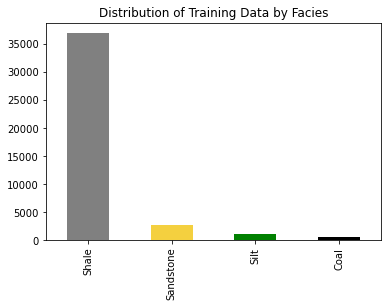

In [8]:
# Count the number of unique entries for each facies, sort them by facies number (instead of by number of entries)
facies_counts = df['Facies'].value_counts().sort_index()

# Use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, title='Distribution of Training Data by Facies')
facies_counts

# VISUALISASIKAN DATA WELL YANG ADA

In [13]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='DEPTH')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=11, figsize=(15, 18))
    ax[1].plot(logs.SP, logs.DEPTH, '-g')
    ax[0].plot(logs.GR, logs.DEPTH, '-')
    ax[2].plot(logs.RES, logs.DEPTH, '-', color='0.5')
    ax[3].plot(logs.RHOB, logs.DEPTH, '-', color='orange')
    ax[4].plot(logs.NPHI, logs.DEPTH, '-', color='black')
    ax[5].plot(logs.VSH, logs.DEPTH, '-', color='purple')
    ax[6].plot(logs.PHIE, logs.DEPTH, '-', color='cyan')
    ax[7].plot(logs.SW, logs.DEPTH, '-', color='blue')
    ax[8].plot(logs.Core_Porosity, logs.DEPTH, '-', color='red')
    ax[9].plot(logs.Core_Permeability, logs.DEPTH, '-', color='gold')
    
    im=ax[10].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=4)
    
    divider = make_axes_locatable(ax[10])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join(['Shale', 'SS', 'Silt', 'Coal']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[1].set_xlabel("SP")
    ax[1].set_xlim(logs.SP.min(),logs.SP.max())
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[2].set_xlabel("RES")
    ax[2].set_xlim(logs.RES.min(),logs.RES.max())
    ax[3].set_xlabel("RHOB")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("NPHI")
    ax[4].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[5].set_xlabel("VSH")
    ax[5].set_xlim(logs.VSH.min(),logs.VSH.max())
    ax[6].set_xlabel("PHIE")
    ax[6].set_xlim(logs.PHIE.min(),logs.PHIE.max())
    ax[7].set_xlabel("SW")
    ax[7].set_xlim(logs.SW.min(),logs.SW.max())
    ax[8].set_xlabel("Core_Porosity")
    ax[8].set_xlim(logs.Core_Porosity.min(),logs.Core_Porosity.max())
    ax[9].set_xlabel("Core_Permeability")
    ax[9].set_xlim(logs.Core_Permeability.min(),logs.Core_Permeability.max())
    
    ax[10].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]);  ax[5].set_yticklabels([]); ax[6].set_yticklabels([]); 
    ax[7].set_yticklabels([]); ax[8].set_yticklabels([]); ax[9].set_yticklabels([]);
    ax[10].set_yticklabels([])
    
    ax[10].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELLNAME'], fontsize=14,y=0.94)

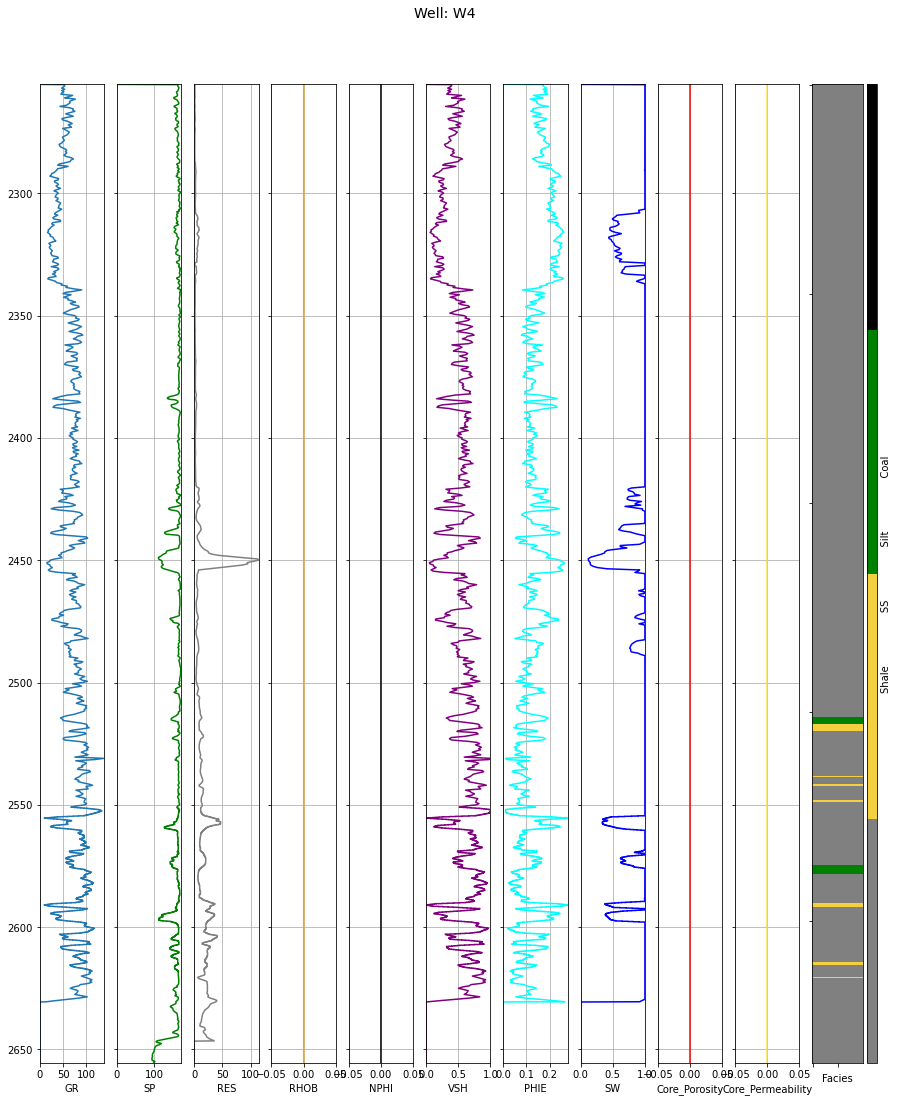

In [14]:
#Contoh display data well logging
make_facies_log_plot(df[df['WELLNAME'] == 'W4'], facies_colors)

# MEMPERSIAPKAN DATA YANG ADA UNTUK MELAKUKAN MACHINE LEARNING

In [11]:
#Mempersiapkan data untuk melakukan machine learning.
#Memisahkan data menjadi data train dan data test
from sklearn.model_selection import train_test_split
training_data, validation_data = train_test_split(df, test_size=0.7, random_state=42, shuffle=True)

# MEMVISUALISASIKAN DATA SET YANG ADA, UNTUK MENEMUKAN HUBUNGAN DARI SETIAP VARIABEL YANG ADA PADA DATA SET

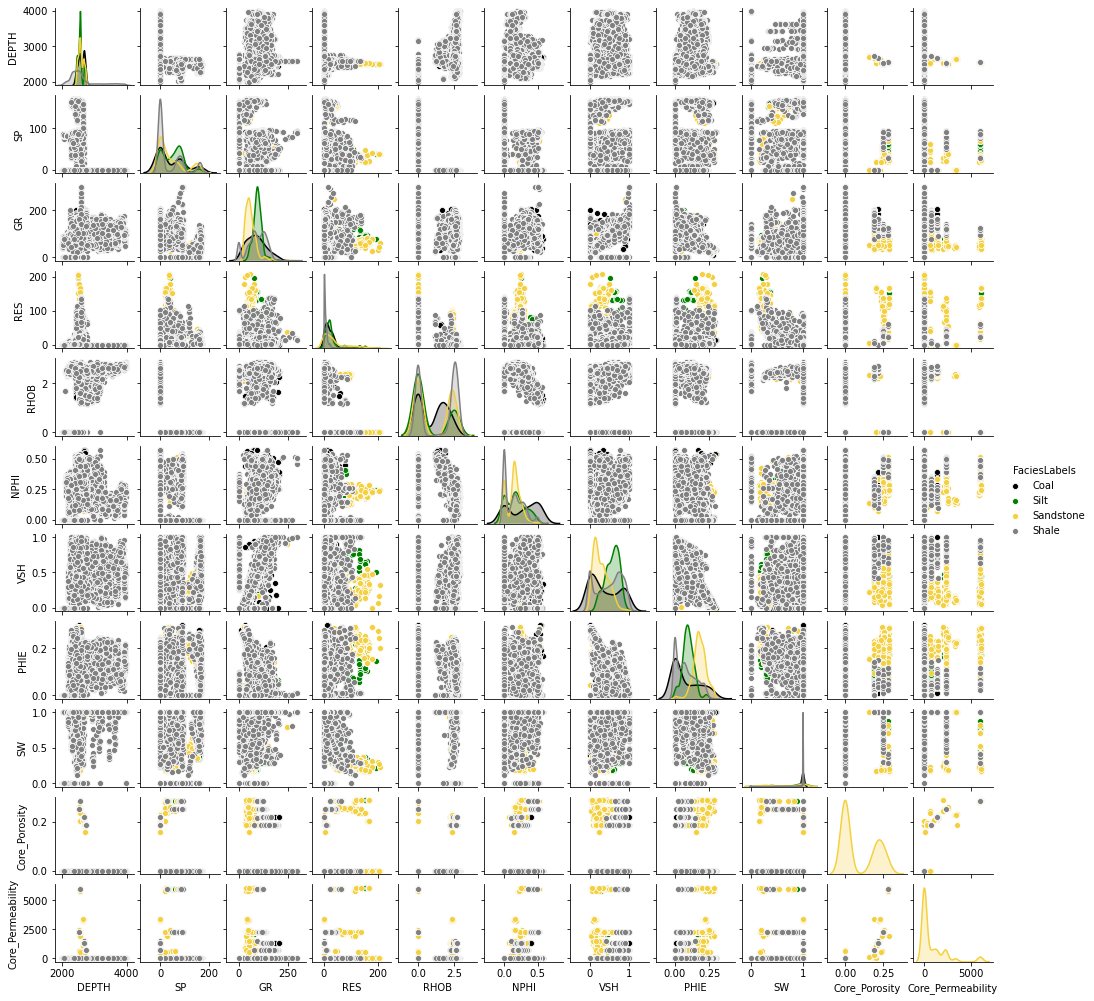

In [15]:
#memvisualisasikan 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(training_data.drop(['WELLNAME', "Facies"], axis=1), hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)), size=1.25);

# SEPARATE FEATURES FROM LABELS FOR OUR TRAINING DATA

In [16]:
X = training_data[["SP","GR","RES","RHOB","NPHI","VSH","PHIE","SW"]]
y = training_data["Facies"]

In [17]:
X_validation = validation_data[["SP","GR","RES","RHOB","NPHI","VSH","PHIE","SW"]]
y_validation = validation_data["Facies"]

# Standardising/whitening the data
# scikit-learn includes a preprocessing module that can 'standardise' the data (giving each variable zero mean and unit variance, also called whitening).

# Many machine learning algorithms assume features will be standard normally distributed data (ie: Gaussian with zero mean and unit variance)

In [18]:
from sklearn import preprocessing

# Standardise the training data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# The factors used to standardise the training set must be applied to any subsequent feature set that will be input to the classifier.

In [19]:
# Standardise the validation data using the same transform
X_validation = scaler.transform(X_validation)

# Code for printing a pretty confusion matrix - hidden during presentation

In [23]:
# Code for printing a pretty confusion matrix - hidden during presentation

def display_cm(cm, labels, hide_zeros=False, display_metrics=False):
    """Display confusion matrix with labels, along with
       metrics such as Recall, Precision and F1 score.
       Based on Zach Guo's print_cm gist at
       https://gist.github.com/zachguo/10296432
    """

    precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')
    recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')
    F1 = 2 * (precision * recall) / (precision + recall)
    
    precision[np.isnan(precision)] = 0
    recall[np.isnan(recall)] = 0
    F1[np.isnan(F1)] = 0
    
    total_precision = np.sum(precision * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_recall = np.sum(recall * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_F1 = np.sum(F1 * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + " Pred", end=' ')
    for label in labels: 
        print("%{0}s".format(columnwidth) % label, end=' ')
    print("%{0}s".format(columnwidth) % 'Total')
    print("    " + " True")
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=' ')
        for j in range(len(labels)): 
            cell = "%{0}d".format(columnwidth) % cm[i, j]
            if hide_zeros:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            print(cell, end=' ')
        print("%{0}d".format(columnwidth) % sum(cm[i,:]))
        
    if display_metrics:
        print()
        print("Precision", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.3f".format(columnwidth) % precision[j]
            print(cell, end=' ')
        print("%{0}.3f".format(columnwidth) % total_precision)
        print("   Recall", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.3f".format(columnwidth) % recall[j]
            print(cell, end=' ')
        print("%{0}.3f".format(columnwidth) % total_recall)
        print("       F1", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.3f".format(columnwidth) % F1[j]
            print(cell, end=' ')
        print("%{0}.3f".format(columnwidth) % total_F1)

# The first model to build for our team is Random Forest ML Model

In [21]:
Cl = RandomForestClassifier(n_estimators=100, max_features=0.1, min_samples_leaf=25,
                            min_samples_split=50, class_weight='balanced', random_state=42, n_jobs=-1)

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

scores = []

for method in methods:
    
    cv=lpgo.split(X, y, groups)
    validated = cross_val_score(method, X, y, scoring="f1_weighted", cv=cv, n_jobs=-1)
    scores.append(validated)
    
scores = np.array(scores)
scores = np.swapaxes(scores, 0, 1)
scores = pd.DataFrame(data=scores, columns=method_list)
scores.head()

,RF submission 3,One vs Rest
0,0.923222,0.913990
1,0.879315,0.887348
2,0.863488,0.879882
3,0.903536,0.894391
4,0.848453,0.876141


# Applying Random Forest Algorithm to validation data

In [22]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100, max_features=0.1, min_samples_leaf=25,
                            min_samples_split=50, class_weight='balanced', random_state=42, n_jobs=-1)

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X,y)

y_pred=clf2.predict(X_validation)

# Now Let's check the whether this random forest model precision for sandstone

In [26]:
predicted_labels = clf2.predict(X_validation)

conf = confusion_matrix(y_validation, predicted_labels)
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("General Accuracy:",metrics.accuracy_score(y_validation, y_pred))

     Pred     Shale Sandstone      Silt      Coal     Total
     True
        Shale     22640      1396      1321       547     25904
    Sandstone        66      1528       199        34      1827
         Silt        56       100       581        14       751
         Coal        24        26        28       278       356

Precision     0.994     0.501     0.273     0.318     0.935
   Recall     0.874     0.836     0.774     0.781     0.868
       F1     0.930     0.627     0.403     0.452     0.891
General Accuracy: 0.8678479783618837


# We only got 0.501 precision for sandstone with random forest model. To get a better precision our team try another model. We use AdaBoosting Model

In [33]:
Cl = AdaBoostClassifier(n_estimators=100,random_state=42)

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']


lpgo = LeavePGroupsOut(n_groups=2)

scores = []

for method in methods:
    
    cv=lpgo.split(X, y, groups)
    validated = cross_val_score(method, X, y, scoring="f1_weighted", cv=cv, n_jobs=-1)
    scores.append(validated)
    
scores = np.array(scores)
scores = np.swapaxes(scores, 0, 1)
scores = pd.DataFrame(data=scores, columns=method_list)
scores.head()

,RF submission 3,One vs Rest
0,0.896721,0.904271
1,0.806354,0.812129
2,0.685364,0.816216
3,0.828841,0.873427
4,0.781070,0.830636


# Applying AdaBoost Algorithm to validation data

In [36]:
#Import Random Forest Model
from sklearn.ensemble import AdaBoostClassifier

#Create a Gaussian Classifier
clf2=AdaBoostClassifier(n_estimators=100,random_state=0)

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X,y)

y_pred=clf2.predict(X_validation)

# Now Let's check the whether this AdaBoost model precision for sandstone

In [41]:
predicted_labels = clf2.predict(X_validation)

conf = confusion_matrix(y_validation, predicted_labels)
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("General Accuracy:",metrics.accuracy_score(y_validation, y_pred))

     Pred     Shale Sandstone      Silt      Coal     Total
     True
        Shale     23295       564       694      1351     25904
    Sandstone       731      1043        49         4      1827
         Silt       363       134       243        11       751
         Coal       222        57        11        66       356

Precision     0.947     0.580     0.244     0.046     0.894
   Recall     0.899     0.571     0.324     0.185     0.855
       F1     0.922     0.575     0.278     0.074     0.873
General Accuracy: 0.8546709203134752


# We only got 0.58 precision for sandstone with AdaBoost model.To get a better precision our team try another model. We use KNN Model

In [45]:
Cl = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree', 
                          leaf_size = 30,  n_jobs = -1)

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

scores = []

for method in methods:
    
    cv=lpgo.split(X, y, groups)
    validated = cross_val_score(method, X, y, scoring="f1_weighted", cv=cv, n_jobs=-1)
    scores.append(validated)
    
scores = np.array(scores)
scores = np.swapaxes(scores, 0, 1)
scores = pd.DataFrame(data=scores, columns=method_list)
scores.head()

,RF submission 3,One vs Rest
0,0.900816,0.897854
1,0.811383,0.816853
2,0.840322,0.836903
3,0.852707,0.855088
4,0.861285,0.833354


# Applying KNN Algorithm to validation data

In [47]:
#Import Random Forest Model
from sklearn.neighbors import KNeighborsClassifier

#Create a Gaussian Classifier
clf2=KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree', 
                          leaf_size = 30,  n_jobs = -1)

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X,y)

y_pred=clf2.predict(X_validation)

# Now Let's check the whether this KNN model precision for sandstone

In [48]:
predicted_labels = clf2.predict(X_validation)

conf = confusion_matrix(y_validation, predicted_labels)
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("General Accuracy:",metrics.accuracy_score(y_validation, y_pred))

     Pred     Shale Sandstone      Silt      Coal     Total
     True
        Shale     25613       137       102        52     25904
    Sandstone       367      1417        43                1827
         Silt       275       102       373         1       751
         Coal       150        26         7       173       356

Precision     0.970     0.842     0.710     0.765     0.953
   Recall     0.989     0.776     0.497     0.486     0.956
       F1     0.979     0.808     0.585     0.595     0.953
General Accuracy: 0.9562382966918649


# We only got 0.842 precision for sandstone with KNN model. To get a better precision our team try another model. We can use another model again, now we use Hist Gradien Boosting Model

In [59]:
Cl = HistGradientBoostingClassifier()

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

scores = []

for method in methods:
    
    cv=lpgo.split(X, y, groups)
    validated = cross_val_score(method, X, y, scoring="f1_weighted", cv=cv, n_jobs=-1)
    scores.append(validated)
    
scores = np.array(scores)
scores = np.swapaxes(scores, 0, 1)
scores = pd.DataFrame(data=scores, columns=method_list)
scores.head()

,RF submission 3,One vs Rest
0,0.902218,0.902871
1,0.808006,0.811434
2,0.838260,0.839701
3,0.845809,0.843253
4,0.823744,0.821376


# Applying Hist Gradien Boosting Algorithm to validation data

In [60]:
#Import Random Forest Model
from sklearn.ensemble import GradientBoostingClassifier

#Create a Gaussian Classifier
clf2=HistGradientBoostingClassifier()

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X,y)

y_pred=clf2.predict(X_validation)

# Now Let's check the whether this Hist Gradien Boosting model precision for sandstone

In [61]:
predicted_labels = clf2.predict(X_validation)

conf = confusion_matrix(y_validation, predicted_labels)
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("General Accuracy:",metrics.accuracy_score(y_validation, y_pred))

     Pred     Shale Sandstone      Silt      Coal     Total
     True
        Shale     25536       194       105        69     25904
    Sandstone       287      1470        69         1      1827
         Silt       220        79       441        11       751
         Coal       119        23         1       213       356

Precision     0.976     0.832     0.716     0.724     0.957
   Recall     0.986     0.805     0.587     0.598     0.959
       F1     0.981     0.818     0.645     0.655     0.958
General Accuracy: 0.9591511200499341


# We only got ... precision for sandstone with Hist Gradien Boosting model. To get a better precision our team try another model. We can use another model again, now we use Extra Trees Classifier Model

In [62]:
Cl = ExtraTreesClassifier(n_estimators=100, random_state=42)

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

scores = []

for method in methods:
    
    cv=lpgo.split(X, y, groups)
    validated = cross_val_score(method, X, y, scoring="f1_weighted", cv=cv, n_jobs=-1)
    scores.append(validated)
    
scores = np.array(scores)
scores = np.swapaxes(scores, 0, 1)
scores = pd.DataFrame(data=scores, columns=method_list)
scores.head()

,RF submission 3,One vs Rest
0,0.901019,0.900356
1,0.805239,0.804910
2,0.852796,0.850543
3,0.840266,0.840699
4,0.831178,0.833758


# Applying Extra Trees Classifier Algorithm to validation data

In [63]:

#Create a Gaussian Classifier
clf2=ExtraTreesClassifier(n_estimators=100, random_state=42)

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X,y)

y_pred=clf2.predict(X_validation)

# Now Let's check the whether this Extra Trees Classifier model precision for sandstone

In [64]:
predicted_labels = clf2.predict(X_validation)

conf = confusion_matrix(y_validation, predicted_labels)
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("General Accuracy:",metrics.accuracy_score(y_validation, y_pred))

     Pred     Shale Sandstone      Silt      Coal     Total
     True
        Shale     25669       121        82        32     25904
    Sandstone       251      1519        54         3      1827
         Silt       227        66       454         4       751
         Coal       109        23         2       222       356

Precision     0.978     0.879     0.767     0.851     0.964
   Recall     0.991     0.831     0.605     0.624     0.966
       F1     0.984     0.854     0.676     0.720     0.965
General Accuracy: 0.9662251196338165


# We got 0.879 precision for sandstone with Extra Trees Classifier model and this is the best precision so far for only just one model. To get a better precision our team try to hyperparameter tuning for this model, to get a better precision for sandstone. We can tune the hyperparameter until the precision is getting better or even best for this model

In [65]:
Cl = ExtraTreesClassifier(n_estimators=100, random_state=42)

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

scores = []

for method in methods:
    
    cv=lpgo.split(X, y, groups)
    validated = cross_val_score(method, X, y, scoring="f1_weighted", cv=cv, n_jobs=-1)
    scores.append(validated)
    
scores = np.array(scores)
scores = np.swapaxes(scores, 0, 1)
scores = pd.DataFrame(data=scores, columns=method_list)
scores.head()

,RF submission 3,One vs Rest
0,0.901019,0.900356
1,0.805239,0.804910
2,0.852796,0.850543
3,0.840266,0.840699
4,0.831178,0.833758


# Applying Extra Trees Classifier Algorithm to validation data

In [66]:
#Import
from sklearn.ensemble import ExtraTreesClassifier

#Create a Gaussian Classifier and we can tuning the hyper parameter to get a better precision
clf2=ExtraTreesClassifier(n_estimators=750, max_features=1, random_state=42, min_samples_split=5)

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X,y)

y_pred=clf2.predict(X_validation)

# Now Let's check the whether this Extra Trees Classifier model precision for sandstone

In [67]:
predicted_labels = clf2.predict(X_validation)

conf = confusion_matrix(y_validation, predicted_labels)
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("General Accuracy:",metrics.accuracy_score(y_validation, y_pred))

     Pred     Shale Sandstone      Silt      Coal     Total
     True
        Shale     25738        86        51        29     25904
    Sandstone       325      1466        33         3      1827
         Silt       298        61       390         2       751
         Coal       128        23                 205       356

Precision     0.972     0.896     0.823     0.858     0.962
   Recall     0.994     0.802     0.519     0.576     0.964
       F1     0.982     0.847     0.637     0.689     0.961
General Accuracy: 0.9639711491781677


# We got 0.896 precision for sandstone with Extra Trees Classifier model that has been hyperparameter tuned. the result from tuning hyperparameter is pretty impressive, because it really improve the precision of sandstone prediction result. but, we still can improve the precision by stacking the model. We will stack the model from the best precision model that we have made before which is Extra Trees Classifier, KNN, and Hist Gradien Boost Model.

In [68]:
estimators = [
    ('etc', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree', 
                                 leaf_size = 30,  n_jobs = -1))]
    
Cl= StackingClassifier(estimators=estimators, 
                        final_estimator=HistGradientBoostingClassifier())

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

scores = []

for method in methods:
    
    cv=lpgo.split(X, y, groups)
    validated = cross_val_score(method, X, y, scoring="f1_weighted", cv=cv, n_jobs=-1)
    scores.append(validated)
    
scores = np.array(scores)
scores = np.swapaxes(scores, 0, 1)
scores = pd.DataFrame(data=scores, columns=method_list)
scores.head()

,RF submission 3,One vs Rest
0,0.902588,0.902121
1,0.805968,0.806979
2,0.838642,0.844096
3,0.843218,0.841545
4,0.822361,0.820630


# Applying the 3 stack model Algorithm to validation data

In [69]:
#Create a Gaussian Classifier
clf2=StackingClassifier(estimators=estimators, 
                        final_estimator=HistGradientBoostingClassifier())

OVR = OneVsRestClassifier(Cl,n_jobs=-1)
groups = training_data['WELLNAME']
methods = [Cl, OVR]
method_list = ['RF submission 3','One vs Rest']

lpgo = LeavePGroupsOut(n_groups=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X,y)

y_pred=clf2.predict(X_validation)

# Now Let's check the whether this 3 stack model precision for sandstone

In [70]:
predicted_labels = clf2.predict(X_validation)

conf = confusion_matrix(y_validation, predicted_labels)
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("General Accuracy:",metrics.accuracy_score(y_validation, y_pred))

     Pred     Shale Sandstone      Silt      Coal     Total
     True
        Shale     25638        84       106        76     25904
    Sandstone       275      1500        49         3      1827
         Silt       225        64       459         3       751
         Coal       118        11         2       225       356

Precision     0.976     0.904     0.745     0.733     0.963
   Recall     0.990     0.821     0.611     0.632     0.965
       F1     0.983     0.861     0.672     0.679     0.963
General Accuracy: 0.9647687079547819


# This is the best precision prediction for standstone that we got so far, we got 90.4% precision from stacking the three model. The three model of them is consist, Extra Trees Classifier, KNN, dan Hist Gradien Model.

### Lastly lets save the well log data with predicted facies

In [77]:
df.to_csv('well_data_with_facies(stack (etc,hgb,knn)).csv')